In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import shutil
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#Loading the text file
df = pd.read_csv("../input/breakhis/Folds.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39545 entries, 0 to 39544
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fold      39545 non-null  int64 
 1   mag       39545 non-null  int64 
 2   grp       39545 non-null  object
 3   filename  39545 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [ ]:
#Show first 5 entries
df.head()

,fold,mag,grp,filename
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
3,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
4,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...


In [ ]:
print("Number of missing values in each column are: \n", df.isnull().sum())

Number of missing values in each column are: 
 fold        0
mag         0
grp         0
filename    0
dtype: int64


Checking for duplicates

In [ ]:
#find duplicate rows across specific columns
duplicateRows = df[df.duplicated(['mag', 'grp', 'filename'])]

In [ ]:
duplicateRows

,fold,mag,grp,filename
7909,2,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
7910,2,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
7911,2,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
7912,2,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
7913,2,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
...,...,...,...,...
39540,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
39541,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
39542,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
39543,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...


**Drop duplicates**

In [ ]:
dataset = df.iloc[:7909, :]

In [ ]:
dataset

,fold,mag,grp,filename
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
3,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
4,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
...,...,...,...,...
7904,1,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
7905,1,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
7906,1,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
7907,1,400,test,BreaKHis_v1/histology_slides/breast/malignant/...


In [ ]:
#Renaming the column filename to path
dataset = dataset.rename(columns = {"filename":"path"})
#Show first 5 entries
dataset.head()

,fold,mag,grp,path
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
3,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
4,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...


**Extracting file name, class and subclass labels from the path column**

In [ ]:
#Creating new columns for the filename, file location and labels from the path column
dataset['filename'] = dataset['path'].apply(lambda x:x.split("/")[-1])
dataset["label"] = dataset['path'].apply(lambda x: x.split("/")[3])
dataset["sublabel"] = dataset['path'].apply(lambda x: x.split("/")[5])
dataset['file_loc'] = dataset['label'] + "_" + dataset['filename']

In [ ]:
#Show first 5 entries
dataset.head()

,fold,mag,grp,path,filename,label,sublabel,file_loc
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-001.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-001.png
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-002.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-002.png
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-003.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-003.png
3,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-004.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-004.png
4,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-005.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-005.png


Encoding the class to integer

In [ ]:
#Encoding the class to integer
dataset['class'] = dataset['label'].apply(lambda x: 0 if x =='benign' else 1)

In [ ]:
#Show first 5 entries
dataset.head()

,fold,mag,grp,path,filename,label,sublabel,file_loc,class
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-001.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-001.png,0
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-002.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-002.png,0
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-003.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-003.png,0
3,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-004.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-004.png,0
4,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-005.png,benign,adenosis,benign_SOB_B_A-14-22549AB-100-005.png,0


In [ ]:
print('Number of samples for each class: \n', dataset["class"].value_counts())

Number of samples for each class: 
 1    5429
0    2480
Name: class, dtype: int64


Extracting images from the folders

In [ ]:
#Creating new directory
os.makedirs("../Image_Dataset/")

In [ ]:
#Creating new directory for benign
os.makedirs("../Image_Dataset/Benign/")

In [ ]:
#Creating new directory for malignant
os.makedirs("../Image_Dataset/Malignant/")

In [ ]:
#Moving all the images into one folder (Image_Dataset)
i = 0
for p in dataset['path']:
    src = "../input/breakhis/BreaKHis_v1/" + p
    dest = "../Image_Dataset/"
    if dataset["class"][i] == 0:
        dest = "../Image_Dataset/Benign/"
    else:
        dest = "../Image_Dataset/Malignant/"
    #saving the files with its corresponding class and patient_id
    dest = os.path.join(dest,src.split("/")[7]+ "_" + src.split("/")[-1])
    shutil.copyfile(src,dest)
    i +=1

In [ ]:
#Check number of images in each folder
path = "../Image_Dataset/"
dir_list = [os.path.join(path,i) for i in os.listdir(path)]
size_dict = {}
for i,value in enumerate(dir_list):
    size_dict[os.listdir(path)[i]] = len(os.listdir(value))
size_dict

{'Benign': 2480, 'Malignant': 5429}

In [ ]:
#Function to read the dataset from a specified directory
def import_images(folder,target):
    images = []
    for item in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,item), cv2.IMREAD_COLOR)
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append([img,target])
    return images

In [ ]:
#Importing the dataset from the specified directory using the created function and assign them with labels
#Where 0 is for Benign, 1 is malignant and 1 is for Malignant
benign = import_images("../Image_Dataset/Benign",0)
malignant = import_images("../Image_Dataset/Malignant",1)

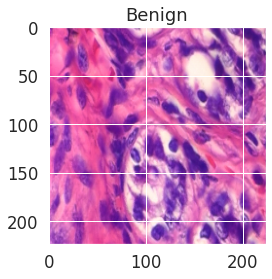

In [ ]:
#Plotting the benign sample
plt.title('Benign')
plt.imshow(benign[0][0])

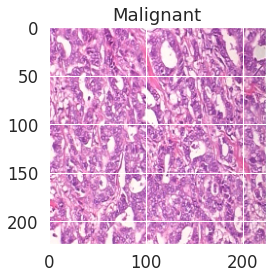

In [ ]:
#Here is a sample of an image in the dataset
plt.title('Malignant')
plt.imshow(malignant[0][0])

In [ ]:
#Joining all the dataset together
benign.extend(malignant)

In [ ]:
#Assigning the dataset to a new variable
full_data = benign

In [ ]:
#Performing the dataset splitting into training and test set
training_data, test_dataset = train_test_split(full_data, test_size = 0.2, random_state = 30)

In [ ]:
#Extracting validation dataset from the training data
training_dataset, val_dataset = train_test_split(training_data, test_size = 0.2, random_state = 30)

In [ ]:
"""Function to separate the dataset into images and label puting the images in array called feature_map and labels into
array called label"""

def split_data(main_data):
    feature_matrix = []
    label = []
    for x,y in main_data:
        feature_matrix.append(x)
        label.append(y)
    return np.array(feature_matrix), np.array(label)

Extracting Training dataset

In [ ]:
#Extract validation images and labels
training_images, training_labels = split_data(training_dataset)

In [ ]:
# Normalize images
training_images = np.array(training_images, dtype="float") / 255.0

In [ ]:
#The shape of the datasets
print(training_images.shape)
print(training_labels.shape)

(5061, 224, 224, 3)
(5061,)


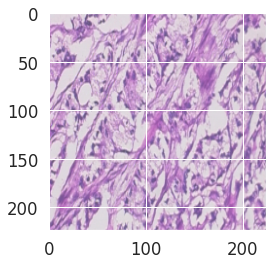

In [ ]:
#The first image as a picture
plt.imshow(training_images[0])

In [ ]:
#The first label in the dataset
training_labels[0]

1

In [ ]:
#Check the data distribution among the classes
print(pd.Series(training_labels).value_counts())

1    3441
0    1620
dtype: int64


Extracting Test dataset

In [ ]:
#Extract validation images and labels
test_images, test_labels = split_data(test_dataset)

In [ ]:
# Normalize images
test_images = np.array(test_images, dtype="float") / 255.0

In [ ]:
#The shape of the datasets
print(test_images.shape)
print(test_labels.shape)

(1582, 224, 224, 3)
(1582,)


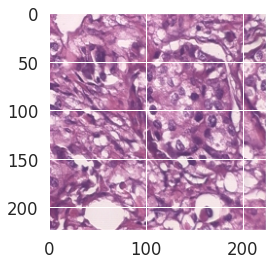

In [ ]:
#The first image as a picture
plt.imshow(test_images[0])

In [ ]:
#The first label in the dataset
test_labels[0]

1

In [ ]:
#Check the data distribution among the classes
print(pd.Series(test_labels).value_counts())

1    1100
0     482
dtype: int64


Extracting Validation dataset

In [ ]:
#Extract validation images and labels
val_images, val_labels = split_data(val_dataset)

In [ ]:
# Normalize images
val_images = np.array(val_images, dtype="float") / 255.0

In [ ]:
#The shape of the datasets
print(val_images.shape)
print(val_labels.shape)

(1266, 224, 224, 3)
(1266,)


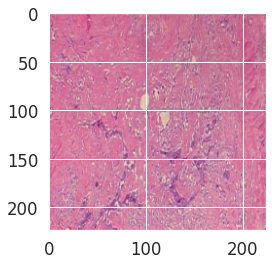

In [ ]:
#The first image as a picture
plt.imshow(val_images[0])

In [ ]:
#The first label in the dataset
val_labels[0]

1

In [ ]:
#Check the data distribution among the classes
print(pd.Series(val_labels).value_counts())

1    888
0    378
dtype: int64


Model Training

In [ ]:
#Importing libraries needed for the modeling and training
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, Callback , ModelCheckpoint
from tensorflow.keras.metrics import Accuracy,binary_crossentropy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Setting the batch size for the cnn model
bs = 32

In [ ]:
#Defining Image Data Generator for image augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    zoom_range=0.2)

In [ ]:
#Defining the base model
cancer_model = Sequential()

#First Layer
cancer_model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (224,224,3), activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))

#Second Layer
cancer_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))

#Third Layer
cancer_model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))
cancer_model.add(Dropout(0.4))

#Fourth Layer
cancer_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))
cancer_model.add(Dropout(0.2))

#Flattening the layers
cancer_model.add(Flatten())

#Adding the dense layer
cancer_model.add(Dense(256, activation = 'relu'))
cancer_model.add(Dense(128, activation = 'relu'))
cancer_model.add(Dense(1, activation = 'sigmoid'))

cancer_model.summary()

2022-11-20 14:30:06.975452: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 27, 27, 128)       0

In [ ]:
#Setting the learning rate to reduce gradually over the training period
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=20*50,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

In [ ]:
#Compiling the model
cancer_model.compile(loss='binary_crossentropy', optimizer = get_optimizer(), metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint("./Best_model/",save_best_only=True,)

In [ ]:
#Fitted the model on the training and and validation dataset using the image augmentor for 200 epochs
history = cancer_model.fit_generator(datagen.flow(training_images, training_labels, batch_size = bs),
                                     validation_data=datagen.flow(val_images, val_labels),
                                     epochs=200,
                                     callbacks=[early_stop,checkpoint],
                                     verbose = 1)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-11-20 14:32:24.954072: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
159/159 [==============================] - 275s 2s/step - loss: 0.5568 - accuracy: 0.7218 - val_loss: 0.5178 - val_accuracy: 0.8412


2022-11-20 14:37:00.499922: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/200
159/159 [==============================] - 274s 2s/step - loss: 0.4457 - accuracy: 0.8232 - val_loss: 0.4731 - val_accuracy: 0.8175
Epoch 3/200
159/159 [==============================] - 272s 2s/step - loss: 0.4270 - accuracy: 0.8362 - val_loss: 0.3912 - val_accuracy: 0.8531
Epoch 4/200
159/159 [==============================] - 272s 2s/step - loss: 0.4082 - accuracy: 0.8417 - val_loss: 0.3762 - val_accuracy: 0.8586
Epoch 5/200
159/159 [==============================] - 272s 2s/step - loss: 0.3939 - accuracy: 0.8481 - val_loss: 0.3617 - val_accuracy: 0.8610
Epoch 6/200
159/159 [==============================] - 271s 2s/step - loss: 0.3877 - accuracy: 0.8479 - val_loss: 0.3772 - val_accuracy: 0.8491
Epoch 7/200
159/159 [==============================] - 272s 2s/step - loss: 0.3880 - accuracy: 0.8516 - val_loss: 0.4566 - val_accuracy: 0.8136
Epoch 8/200
159/159 [==============================] - 277s 2s/step - loss: 0.3756 - accuracy: 0.8556 - val_loss: 0.3612 - val_accuracy:

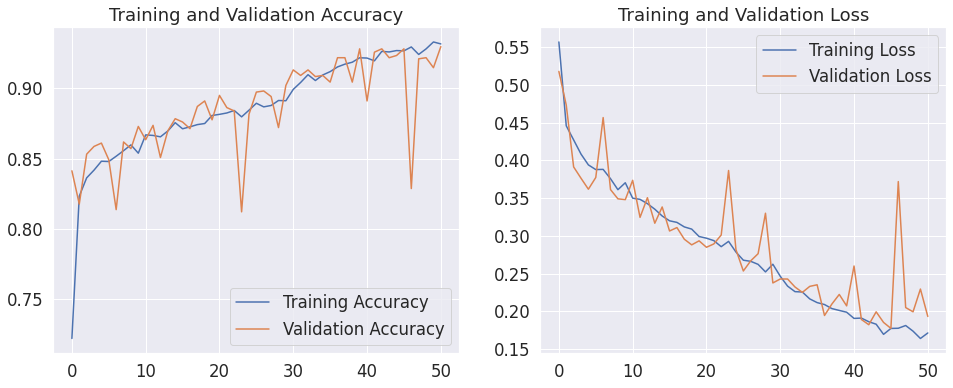

In [ ]:
#Plotting the model results

#Getting the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#Getting the losses
loss = history.history['loss']
val_loss = history.history['val_loss']

#No of epochs it trained
epochs_range = history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Performance Evaluation of the CNN model

In [ ]:
y_pred = cancer_model.predict(test_images)

In [ ]:
print(y_pred)

[[0.999926  ]
 [0.9994818 ]
 [0.84063566]
 ...
 [0.8171614 ]
 [0.79009855]
 [0.9935833 ]]


In [ ]:
#Round up model prediction to 0 and 1 and convert result to an array
rounded = [float(np.round(x)) for x in y_pred]
rounded_predictions = np.asarray(rounded).astype(int)
print(rounded_predictions)

[1 1 1 ... 1 1 1]


In [ ]:
#Classification report
print(classification_report(test_labels, rounded_predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       482
           1       0.96      0.92      0.94      1100

    accuracy                           0.92      1582
   macro avg       0.90      0.91      0.90      1582
weighted avg       0.92      0.92      0.92      1582



[[ 435   47]
 [  83 1017]]


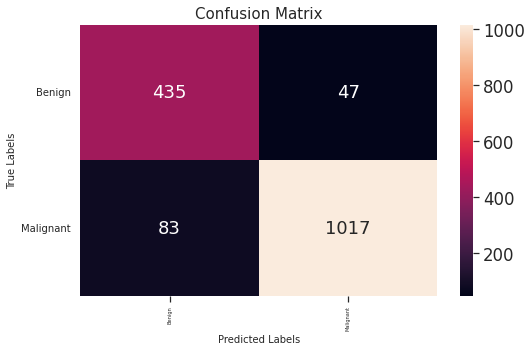

In [ ]:
#Confusion matrix
cm = confusion_matrix(test_labels, rounded_predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Benign', 'Malignant']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('ConMat24.png')
plt.show()

In [ ]:
#Accuracy
accuracy = accuracy_score(test_labels, rounded_predictions)
print('Accuracy: %f' % accuracy)

Accuracy: 0.917826


In [ ]:
#Precision
precision = precision_score(test_labels, rounded_predictions)
print('Precision: %f' % precision)

Precision: 0.955827


In [ ]:
# Recall
recall = recall_score(test_labels, rounded_predictions, pos_label=1)
print('Recall: %f' % recall)

Recall: 0.924545


In [ ]:
#Specificity
specificity = recall_score(test_labels, rounded_predictions, pos_label=0)
print('Specificity: %f' % specificity)

Specificity: 0.902490


In [ ]:
#F1-score
F1_score = f1_score(test_labels, rounded_predictions)
print('F1_score: %f' % F1_score)

F1_score: 0.939926


In [ ]:
#Save the model
cancer_model.save("Final_custom_breast_cancer_model.h5")

VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
#Loading the model
base_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
)

#Making sure the layers of the VGG16 model are not retrained
for layer in base_model.layers:
    layer.trainable = False

2022-11-20 22:26:58.771454: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
#Adding custom top layers
VGG16_model = Sequential()
VGG16_model.add(base_model)

VGG16_model.add(Flatten())
VGG16_model.add(BatchNormalization())
#Adding two dense layer and dropout
VGG16_model.add(Dense(256,activation='relu'))
VGG16_model.add(Dropout(0.5))
VGG16_model.add(Dense(128,activation='relu'))
VGG16_model.add(Dropout(0.5))
VGG16_model.add(Dense(1,activation='sigmoid'))
VGG16_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 25088)             100352    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
#Compiling the model
VGG16_model.compile(optimizer='adam',loss='binary_crossentropy' ,metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint("./Best_model/",save_best_only=True,)

In [ ]:
#Fitted the VGG16 model on the training and and validation dataset using the image augmentor for 50 epochs
VGG16_history = VGG16_model.fit_generator(datagen.flow(training_images, training_labels, batch_size = bs),
                                     validation_data=datagen.flow(val_images, val_labels),
                                     epochs=50,
                                     callbacks=[early_stop,checkpoint],
                                     verbose = 1)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-11-20 22:29:58.202082: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
159/159 [==============================] - 1712s 11s/step - loss: 1.3631 - accuracy: 0.6516 - val_loss: 0.5248 - val_accuracy: 0.7299


2022-11-20 22:58:32.598397: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/50
159/159 [==============================] - 1680s 11s/step - loss: 0.6675 - accuracy: 0.7263 - val_loss: 0.5192 - val_accuracy: 0.7962
Epoch 3/50
159/159 [==============================] - 1690s 11s/step - loss: 0.5223 - accuracy: 0.7663 - val_loss: 0.4485 - val_accuracy: 0.8404
Epoch 4/50
159/159 [==============================] - 1684s 11s/step - loss: 0.4695 - accuracy: 0.7896 - val_loss: 0.3973 - val_accuracy: 0.8523
Epoch 5/50
159/159 [==============================] - 1676s 11s/step - loss: 0.4264 - accuracy: 0.8081 - val_loss: 0.3578 - val_accuracy: 0.8578
Epoch 6/50
159/159 [==============================] - 1686s 11s/step - loss: 0.4099 - accuracy: 0.8206 - val_loss: 0.3857 - val_accuracy: 0.8547
Epoch 7/50
159/159 [==============================] - 1682s 11s/step - loss: 0.3937 - accuracy: 0.8281 - val_loss: 0.3397 - val_accuracy: 0.8697
Epoch 8/50
159/159 [==============================] - 1678s 11s/step - loss: 0.3688 - accuracy: 0.8405 - val_loss: 0.3118 - val_ac

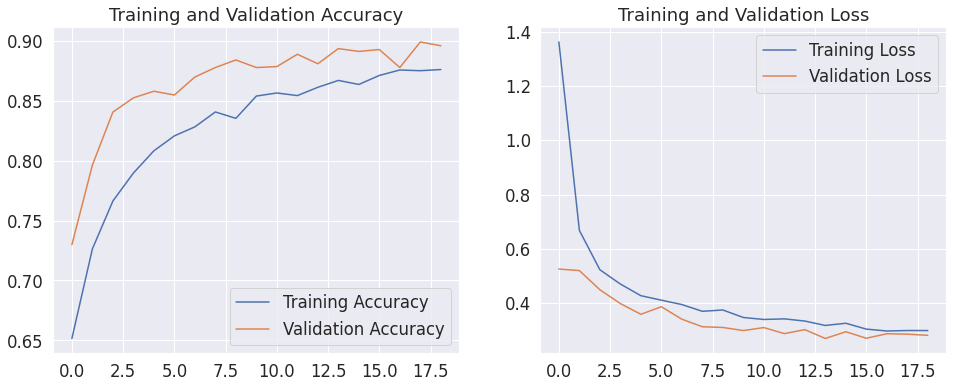

In [ ]:
#Plotting the model results

#Getting the accuracy
acc = VGG16_history.history['accuracy']
val_acc = VGG16_history.history['val_accuracy']

#Getting the losses
loss = VGG16_history.history['loss']
val_loss = VGG16_history.history['val_loss']

#No of epochs it trained
epochs_range = VGG16_history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Performance Evaluation of VGG16 CNN model

In [ ]:
vgg16_y_pred = VGG16_model.predict(test_images)

In [ ]:
print(vgg16_y_pred)

[[1.        ]
 [0.76763475]
 [0.98460585]
 ...
 [0.99826896]
 [0.9351993 ]
 [0.76364946]]


In [ ]:
#Round up model prediction to 0 and 1 and convert result to an array
rounded = [float(np.round(x)) for x in vgg16_y_pred]
rounded_vgg16 = np.asarray(rounded).astype(int)
print(rounded_vgg16)

[1 1 1 ... 1 1 1]


[[ 346  136]
 [  32 1068]]


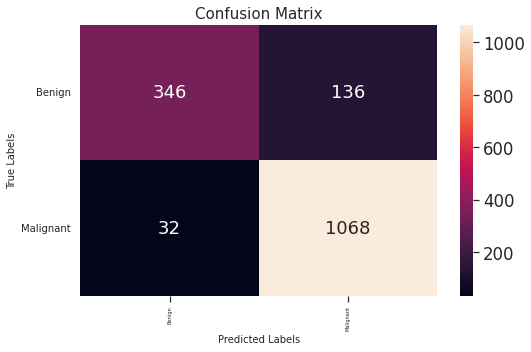

In [ ]:
#Confusion matrix
cm = confusion_matrix(test_labels, rounded_vgg16)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['Benign', 'Malignant']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('ConMat24.png')
plt.show()

In [ ]:
#Classification report
print(classification_report(test_labels, rounded_vgg16))

              precision    recall  f1-score   support

           0       0.92      0.72      0.80       482
           1       0.89      0.97      0.93      1100

    accuracy                           0.89      1582
   macro avg       0.90      0.84      0.87      1582
weighted avg       0.90      0.89      0.89      1582



In [ ]:
#Accuracy
accuracy = accuracy_score(test_labels, rounded_vgg16)
print('Accuracy: %f' % accuracy)

Accuracy: 0.893805


In [ ]:
#Precision
precision = precision_score(test_labels, rounded_vgg16)
print('Precision: %f' % precision)

Precision: 0.887043


In [ ]:
# Recall
recall = recall_score(test_labels, rounded_vgg16, pos_label=1)
print('Recall: %f' % recall)

Recall: 0.970909


In [ ]:
#Specificity
specificity = recall_score(test_labels, rounded_vgg16, pos_label=0)
print('Specificity: %f' % specificity)

Specificity: 0.717842


In [ ]:
#F1-score
F1_score = f1_score(test_labels, rounded_vgg16)
print('F1_score: %f' % F1_score)

F1_score: 0.927083
